In [581]:
import os
import sys
sys.path.insert(0, "../")
import pandas as pd
import numpy as np
import data_processing.utils as utils
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [582]:
TEST_PATH = os.path.join(os.path.dirname(os.getcwd()), 'data_processing/test_files/')
PARTITION_SUBGRADES = "partition_subgrades_10000.csv"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 160)

In [583]:
cat_vars_of_interest = ["term", "grade", "sub_grade", "emp_title", "emp_length", "home_ownership", "verification_status", "purpose", "addr_state", 
    "initial_list_status", "application_type", "hardship_flag", "loan_status"
]
num_vars_of_interest = list(set([
    "loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "zip_code", "installment", "issue_d", "annual_inc", "dti", "fico_range_low", "fico_range_high", 
    "revol_bal", "revol_util", "open_acc", "delinq_2yrs", "inq_last_6mths", "total_acc", "mths_since_last_delinq", "mths_since_last_record", "mths_since_rcnt_il",
    "last_credit_pull_d", "open_il_12m", "open_il_24m", "total_bal_il", "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc", "all_util",
    "total_rev_hi_lim", "inq_fi", "total_cu_tl", "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy", "bc_util", "num_accts_ever_120_pd",
    "num_actv_bc_tl", "num_actv_rev_tl", "num_bc_sats", "num_bc_tl", "num_sats", "num_il_tl", "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0", "tot_hi_cred_lim", 
    "pct_tl_nvr_dlq", "percent_bc_gt_75", "total_bal_ex_mort", "total_bc_limit","total_il_high_credit_limit", "mths_since_last_major_derog", "mths_since_recent_bc",
    "mths_since_recent_bc_dlq", "mths_since_recent_inq", "mths_since_recent_revol_delinq"
]))

In [584]:
sampled_by_loan = pd.read_csv(TEST_PATH + PARTITION_SUBGRADES)
sampled_by_loan = sampled_by_loan[num_vars_of_interest + cat_vars_of_interest]
sampled_by_loan.head()

/home/acowlagi/.conda/envs/torch_py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (19,118) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,max_bal_bc,total_bal_il,total_bal_ex_mort,fico_range_low,installment,open_il_12m,all_util,mths_since_rcnt_il,total_acc,bc_util,total_il_high_credit_limit,mths_since_recent_bc,num_rev_accts,mths_since_recent_bc_dlq,total_cu_tl,open_il_24m,acc_open_past_24mths,total_rev_hi_lim,num_op_rev_tl,inq_last_12m,dti,num_actv_rev_tl,tot_hi_cred_lim,funded_amnt_inv,avg_cur_bal,mths_since_recent_revol_delinq,total_bc_limit,il_util,open_rv_24m,num_accts_ever_120_pd,open_rv_12m,revol_bal,funded_amnt,num_actv_bc_tl,num_sats,num_bc_tl,issue_d,bc_open_to_buy,mths_since_last_delinq,pct_tl_nvr_dlq,loan_amnt,mths_since_last_major_derog,open_acc,mths_since_recent_inq,mths_since_last_record,num_il_tl,num_rev_tl_bal_gt_0,percent_bc_gt_75,annual_inc,fico_range_high,zip_code,delinq_2yrs,num_bc_sats,last_credit_pull_d,int_rate,inq_last_6mths,inq_fi,revol_util,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,purpose,addr_state,initial_list_status,application_type,hardship_flag,loan_status
0,4627.0,9935.0,32486.0,695.0,672.73,1.0,62.0,2.0,21.0,81.6,23259.0,27.0,11.0,NaN,0.0,2.0,5.0,28500.0,7.0,6.0,12.28,6.0,472759.0,20000.0,39020.0,NaN,13500.0,43.0,3.0,0.0,2.0,22551.0,20000.0,4.0,12.0,8.0,Dec-2015,2822.0,NaN,100.0,20000.0,NaN,12.0,1.0,NaN,5.0,6.0,75.0,145000.0,699.0,029xx,0.0,5.0,Mar-2019,12.88,0.0,1.0,80.2,36 months,C,C2,President,10+ years,MORTGAGE,Not Verified,debt_consolidation,RI,w,Individual,N,Fully Paid
1,3955.0,0.0,11594.0,700.0,363.07,0.0,44.0,79.0,17.0,62.7,0.0,7.0,8.0,26.0,0.0,0.0,3.0,26400.0,7.0,0.0,6.39,5.0,263351.0,16000.0,28037.0,26.0,16300.0,NaN,3.0,0.0,1.0,11594.0,16000.0,4.0,8.0,4.0,Dec-2015,6087.0,26.0,86.7,16000.0,NaN,8.0,NaN,NaN,4.0,5.0,25.0,90000.0,704.0,064xx,0.0,4.0,Mar-2019,12.88,0.0,0.0,43.9,60 months,C,C2,Unix System Administrator,10+ years,OWN,Not Verified,home_improvement,CT,w,Individual,N,Current
2,1044.0,36504.0,38464.0,690.0,203.44,1.0,76.0,3.0,10.0,19.2,40286.0,15.0,3.0,NaN,0.0,3.0,4.0,10200.0,2.0,3.0,23.26,2.0,50486.0,6000.0,9616.0,NaN,10200.0,91.0,1.0,0.0,0.0,1960.0,6000.0,2.0,4.0,2.0,Dec-2015,8240.0,NaN,100.0,6000.0,NaN,4.0,3.0,NaN,7.0,2.0,0.0,38700.0,694.0,282xx,0.0,2.0,Aug-2018,13.44,1.0,8.0,19.2,36 months,C,C3,machine operation,3 years,OWN,Source Verified,debt_consolidation,NC,w,Individual,N,Fully Paid
3,5756.0,0.0,6727.0,715.0,336.37,2.0,64.0,9.0,42.0,70.8,0.0,1.0,36.0,NaN,0.0,2.0,12.0,10500.0,5.0,3.0,3.30,2.0,10500.0,10000.0,1682.0,NaN,9500.0,NaN,9.0,0.0,5.0,6727.0,10000.0,2.0,5.0,23.0,Dec-2015,2773.0,NaN,100.0,10000.0,NaN,5.0,7.0,NaN,4.0,3.0,33.3,60000.0,719.0,986xx,0.0,4.0,Jun-2017,12.88,0.0,1.0,64.1,36 months,C,C2,Truck Driver,< 1 year,RENT,Verified,debt_consolidation,WA,w,Individual,N,Fully Paid
4,1721.0,36551.0,40965.0,705.0,273.39,1.0,81.0,6.0,10.0,38.6,39725.0,5.0,8.0,NaN,1.0,2.0,8.0,10900.0,6.0,3.0,23.26,4.0,50625.0,8000.0,5121.0,NaN,8500.0,92.0,6.0,0.0,3.0,4414.0,8000.0,3.0,8.0,5.0,Dec-2015,5220.0,NaN,100.0,8000.0,NaN,8.0,5.0,NaN,2.0,4.0,25.0,42000.0,709.0,973xx,0.0,4.0,Jan-2019,13.99,1.0,0.0,40.5,36 months,C,C4,District Manager,< 1 year,RENT,Not Verified,other,OR,w,Individual,N,Fully Paid


In [585]:
sampled_by_loan.reset_index(drop = True)

,max_bal_bc,total_bal_il,total_bal_ex_mort,fico_range_low,installment,open_il_12m,all_util,mths_since_rcnt_il,total_acc,bc_util,total_il_high_credit_limit,mths_since_recent_bc,num_rev_accts,mths_since_recent_bc_dlq,total_cu_tl,open_il_24m,acc_open_past_24mths,total_rev_hi_lim,num_op_rev_tl,inq_last_12m,dti,num_actv_rev_tl,tot_hi_cred_lim,funded_amnt_inv,avg_cur_bal,mths_since_recent_revol_delinq,total_bc_limit,il_util,open_rv_24m,num_accts_ever_120_pd,open_rv_12m,revol_bal,funded_amnt,num_actv_bc_tl,num_sats,num_bc_tl,issue_d,bc_open_to_buy,mths_since_last_delinq,pct_tl_nvr_dlq,loan_amnt,mths_since_last_major_derog,open_acc,mths_since_recent_inq,mths_since_last_record,num_il_tl,num_rev_tl_bal_gt_0,percent_bc_gt_75,annual_inc,fico_range_high,zip_code,delinq_2yrs,num_bc_sats,last_credit_pull_d,int_rate,inq_last_6mths,inq_fi,revol_util,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,purpose,addr_state,initial_list_status,application_type,hardship_flag,loan_status
0,4627.0,9935.0,32486.0,695.0,672.73,1.0,62.0,2.0,21.0,81.6,23259.0,27.0,11.0,NaN,0.0,2.0,5.0,28500.0,7.0,6.0,12.28,6.0,472759.0,20000.0,39020.0,NaN,13500.0,43.0,3.0,0.0,2.0,22551.0,20000.0,4.0,12.0,8.0,Dec-2015,2822.0,NaN,100.0,20000.0,NaN,12.0,1.0,NaN,5.0,6.0,75.0,145000.0,699.0,029xx,0.0,5.0,Mar-2019,12.88,0.0,1.0,80.2,36 months,C,C2,President,10+ years,MORTGAGE,Not Verified,debt_consolidation,RI,w,Individual,N,Fully Paid
1,3955.0,0.0,11594.0,700.0,363.07,0.0,44.0,79.0,17.0,62.7,0.0,7.0,8.0,26.0,0.0,0.0,3.0,26400.0,7.0,0.0,6.39,5.0,263351.0,16000.0,28037.0,26.0,16300.0,NaN,3.0,0.0,1.0,11594.0,16000.0,4.0,8.0,4.0,Dec-2015,6087.0,26.0,86.7,16000.0,NaN,8.0,NaN,NaN,4.0,5.0,25.0,90000.0,704.0,064xx,0.0,4.0,Mar-2019,12.88,0.0,0.0,43.9,60 months,C,C2,Unix System Administrator,10+ years,OWN,Not Verified,home_improvement,CT,w,Individual,N,Current
2,1044.0,36504.0,38464.0,690.0,203.44,1.0,76.0,3.0,10.0,19.2,40286.0,15.0,3.0,NaN,0.0,3.0,4.0,10200.0,2.0,3.0,23.26,2.0,50486.0,6000.0,9616.0,NaN,10200.0,91.0,1.0,0.0,0.0,1960.0,6000.0,2.0,4.0,2.0,Dec-2015,8240.0,NaN,100.0,6000.0,NaN,4.0,3.0,NaN,7.0,2.0,0.0,38700.0,694.0,282xx,0.0,2.0,Aug-2018,13.44,1.0,8.0,19.2,36 months,C,C3,machine operation,3 years,OWN,Source Verified,debt_consolidation,NC,w,Individual,N,Fully Paid
3,5756.0,0.0,6727.0,715.0,336.37,2.0,64.0,9.0,42.0,70.8,0.0,1.0,36.0,NaN,0.0,2.0,12.0,10500.0,5.0,3.0,3.30,2.0,10500.0,10000.0,1682.0,NaN,9500.0,NaN,9.0,0.0,5.0,6727.0,10000.0,2.0,5.0,23.0,Dec-2015,2773.0,NaN,100.0,10000.0,NaN,5.0,7.0,NaN,4.0,3.0,33.3,60000.0,719.0,986xx,0.0,4.0,Jun-2017,12.88,0.0,1.0,64.1,36 months,C,C2,Truck Driver,< 1 year,RENT,Verified,debt_consolidation,WA,w,Individual,N,Fully Paid
4,1721.0,36551.0,40965.0,705.0,273.39,1.0,81.0,6.0,10.0,38.6,39725.0,5.0,8.0,NaN,1.0,2.0,8.0,10900.0,6.0,3.0,23.26,4.0,50625.0,8000.0,5121.0,NaN,8500.0,92.0,6.0,0.0,3.0,4414.0,8000.0,3.0,8.0,5.0,Dec-2015,5220.0,NaN,100.0,8000.0,NaN,8.0,5.0,NaN,2.0,4.0,25.0,42000.0,709.0,973xx,0.0,4.0,Jan-2019,13.99,1.0,0.0,40.5,36 months,C,C4,District Manager,< 1 year,RENT,Not Verified,other,OR,w,Individual,N,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9970,4226.0,55705.0,71435.0,670.0,988.93,1.0,67.0,6.0,32.0,47.0,69433.0,5.0,23.0,NaN,1.0,2.0,10.0,36600.0,16.0,9.0,16.73,9.0,449283.0,30000.0,22873.0,NaN,25500.0,80.0,6.0,0.0,4.0,15730.0,30000.0,7.0,21.0,8.0,Oct-2016,13521.0,NaN,100.0,30000.0,NaN,21.0,0.0,64.0,5.0,9.0,12.5,138000.0,674.0,983xx,0.0,8.0,Mar-2019,30.99,4.0,5.0,43.0,60 months,G,G5,Sr. Underwriting Manager,6 years,MORTGAGE,Verified,small_business,WA,w,Individual,N,Current
9971,4110.0,50003.0,73771.0,660.0,1153.75,0.0,67.0,16.0,33.0,95.8,69490.0,30.0,26.0,NaN,1.0,2.0,7.0,30500.0,18.0,3.0,26.40,14.0,99990.0,35000.0,4098.0,NaN,14200.0,54.0,5.0,0.0,2.0,

In [586]:
sampled_by_loan, num_vars_of_interest, cat_vars_of_interest = utils.clean_accepted_df(sampled_by_loan, numeric_cols= num_vars_of_interest, categorical_cols= cat_vars_of_interest, one_hot_threshold=30)
sampled_by_loan.head()

,max_bal_bc,total_bal_il,total_bal_ex_mort,fico_range_low,installment,open_il_12m,all_util,mths_since_rcnt_il,total_acc,bc_util,total_il_high_credit_limit,mths_since_recent_bc,num_rev_accts,mths_since_recent_bc_dlq,total_cu_tl,open_il_24m,acc_open_past_24mths,total_rev_hi_lim,num_op_rev_tl,inq_last_12m,dti,num_actv_rev_tl,tot_hi_cred_lim,funded_amnt_inv,avg_cur_bal,mths_since_recent_revol_delinq,total_bc_limit,il_util,open_rv_24m,num_accts_ever_120_pd,open_rv_12m,revol_bal,funded_amnt,num_actv_bc_tl,num_sats,num_bc_tl,issue_d,bc_open_to_buy,mths_since_last_delinq,pct_tl_nvr_dlq,loan_amnt,mths_since_last_major_derog,open_acc,mths_since_recent_inq,mths_since_last_record,num_il_tl,num_rev_tl_bal_gt_0,percent_bc_gt_75,annual_inc,fico_range_high,delinq_2yrs,num_bc_sats,last_credit_pull_d,int_rate,inq_last_6mths,inq_fi,revol_util,term,sub_grade,emp_title,emp_length,addr_state,initial_list_status,application_type,hardship_flag,lat,long,grade_a,grade_b,grade_c,grade_d,grade_e,grade_f,grade_g,sub_grade_0,sub_grade_1,sub_grade_2,sub_grade_3,sub_grade_4,sub_grade_5,sub_grade_6,sub_grade_7,sub_grade_8,sub_grade_9,sub_grade_10,sub_grade_11,sub_grade_12,sub_grade_13,sub_grade_14,sub_grade_15,sub_grade_16,sub_grade_17,sub_grade_18,sub_grade_19,sub_grade_20,sub_grade_21,sub_grade_22,sub_grade_23,sub_grade_24,sub_grade_25,sub_grade_26,sub_grade_27,sub_grade_28,sub_grade_29,sub_grade_30,sub_grade_31,sub_grade_32,sub_grade_33,sub_grade_34,home_ownership_any,home_ownership_mortgage,home_ownership_own,home_ownership_rent,verification_status_not_verified,verification_status_source_verified,verification_status_verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,loan_status_charged_off,loan_status_current,loan_status_fully_paid,loan_status_in_grace_period,loan_status_late_(16-30_days),loan_status_late_(31-120_days)
0,4627.0,9935.0,32486.0,695.0,672.73,1.0,62.0,2.0,21.0,81.6,23259.0,27.0,11.0,110.0,0.0,2.0,5.0,28500.0,7.0,6.0,12.28,6.0,472759.0,20000.0,39020.0,110.0,13500.0,43.0,3.0,0.0,2.0,22551.0,20000.0,4.0,12.0,8.0,699.0,2822.0,110.0,100.0,20000.0,155.0,12.0,1.0,120.0,5.0,6.0,75.0,145000.0,699.0,0.0,5.0,1885.0,12.88,0.0,1.0,80.2,0,11,3097,10,33,1,0,0,41.8238,-71.4133,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,3955.0,0.0,11594.0,700.0,363.07,0.0,44.0,79.0,17.0,62.7,0.0,7.0,8.0,26.0,0.0,0.0,3.0,26400.0,7.0,0.0,6.39,5.0,263351.0,16000.0,28037.0,26.0,16300.0,76.0,3.0,0.0,1.0,11594.0,16000.0,4.0,8.0,4.0,699.0,6087.0,26.0,86.7,16000.0,155.0,8.0,25.0,120.0,4.0,5.0,25.0,90000.0,704.0,0.0,4.0,1885.0,12.88,0.0,0.0,43.9,1,11,4545,10,6,1,0,0,41.3435,-73.0703,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1044.0,36504.0,38464.0,690.0,203.44,1.0,76.0,3.0,10.0,19.2,40286.0,15.0,3.0,110.0,0.0,3.0,4.0,10200.0,2.0,3.0,23.26,2.0,50486.0,6000.0,9616.0,110.0,10200.0,91.0,1.0,0.0,0.0,1960.0,6000.0,2.0,4.0,2.0,699.0,8240.0,110.0,100.0,6000.0,155.0,4.0,3.0,120.0,7.0,2.0,0.0,38700.0,694.0,0.0,2.0,1673.0,13.44,1.0,8.0,19.2,0,12,5085,3,29,1,0,0,35.2287,-80.8458,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,5756.0,0.0,6727.0,715.0,336.37,2.0,64.0,9.0,42.0,70.8,0.0,1.0,36.0,110.0,0.0,2.0,12.0,10500.0,5.0,3.0,3.30,2.0,10500.0,10000.0,1682.0,110.0,9500.0,76.0,9.0,0.0,5.0,6727.0,10000.0,2.0,5.0,23.0,699.0,2773.0,110.0,100.0,10000.0,155.0,5.0,7.0,120.0,4.0,3.0,33.3,60000.0,719.0,0.0,4.0,1247.0,12.88,0.0,1.0,64.1,0,11,4516,0,4,1,0,0,45.9762,-122.4008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1721.0,36551.0,40965.0,705.0,273.39,1.0,81.0,6

In [857]:
shared_features = ["loan_amnt", "annual_inc", "term", "fico_range_low", "fico_range_high", "delinq_2yrs", "mths_since_last_delinq", "issue_d"]
nn_df_with_int_rate = sampled_by_loan[shared_features]
nn_df_with_int_rate["fico"] = (nn_df_with_int_rate["fico_range_high"] + nn_df_with_int_rate["fico_range_low"]) / 2.0
nn_df_with_int_rate.drop(["fico_range_high", "fico_range_low"], axis = 1, inplace = True)
nn_df_with_int_rate["int_rate"] = sampled_by_loan["int_rate"]
nn_df_with_int_rate["sub_grade"] = sampled_by_loan["sub_grade"]

<ipython-input-857-37eef1550e53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn_df_with_int_rate["fico"] = (nn_df_with_int_rate["fico_range_high"] + nn_df_with_int_rate["fico_range_low"]) / 2.0
/home/acowlagi/.conda/envs/torch_py39/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-857-37eef1550e53>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [858]:
nn_df_with_int_rate.head()

,loan_amnt,annual_inc,term,delinq_2yrs,mths_since_last_delinq,issue_d,fico,int_rate,sub_grade
0,20000.0,145000.0,0,0.0,110.0,699.0,697.0,12.88,11
1,16000.0,90000.0,1,0.0,26.0,699.0,702.0,12.88,11
2,6000.0,38700.0,0,0.0,110.0,699.0,692.0,13.44,12
3,10000.0,60000.0,0,0.0,110.0,699.0,717.0,12.88,11
4,8000.0,42000.0,0,0.0,110.0,699.0,707.0,13.99,13


<ipython-input-859-3795945ef951>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

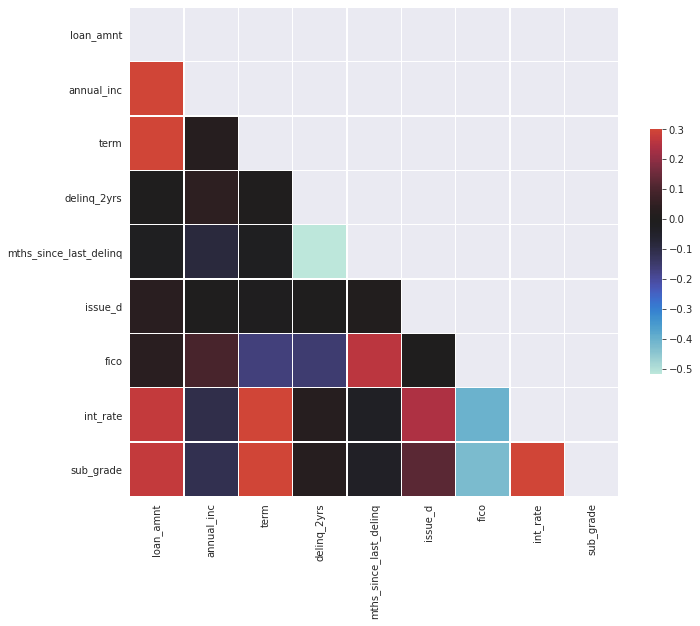

In [859]:
input_cov_mat = np.cov(nn_df_with_int_rate.iloc[:, :-1].T)
corr = nn_df_with_int_rate.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [860]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

scaler = StandardScaler().fit(nn_df_with_int_rate.iloc[:, :-2])
normalizedX = scaler.transform(nn_df_with_int_rate.iloc[:, :-2])


In [861]:
int_rate_corrs = (nn_df_with_int_rate.corr()['int_rate']).values[:-2]

In [862]:
num_neighbors = 5
nn = NearestNeighbors(n_neighbors = num_neighbors, metric = "mahalanobis", metric_params= {'V': np.diag(1/int_rate_corrs)*np.cov(normalized_X_train.T)*np.diag(1/int_rate_corrs)})

In [863]:
nn.fit(normalizedX)
X_neighbors = nn.kneighbors(n_neighbors = num_neighbors)

In [864]:
nn_df_with_int_rate.iloc[X_neighbors[1][0], :]

,loan_amnt,annual_inc,term,delinq_2yrs,mths_since_last_delinq,issue_d,fico,int_rate,sub_grade
2928,20000.0,145000.0,0,0.0,110.0,699.0,697.0,14.48,14
636,20000.0,113544.0,0,0.0,110.0,699.0,697.0,9.17,6
441,22000.0,117000.0,0,0.0,110.0,699.0,697.0,11.48,9
5252,21000.0,130000.0,0,0.0,110.0,699.0,702.0,16.55,16
2930,20000.0,140000.0,0,0.0,30.0,699.0,692.0,14.48,14


In [865]:
# external_data = pd.read_csv(TEST_PATH + "eart_60m_clean.csv", index_col = 0)
# external_data.columns = ["loan_amnt", "fico", "drop", "annual_inc", "drop", "delinq_2yrs", "mths_since_last_delinq"]
# external_data.drop("drop", axis = 1, inplace= True)
# external_data["term"] = 1
# max_mths = nn_df_with_int_rate["mths_since_last_delinq"].max()
# external_data["mths_since_last_delinq"] = external_data["mths_since_last_delinq"].apply(lambda x: max_mths if x == -1 else x)
# external_data = external_data[external_data["fico"] > 660]
# external_data = external_data[["loan_amnt", "annual_inc", "term", "delinq_2yrs", "mths_since_last_delinq", "fico"]]
# external_data.head()

# normalized_ext = scaler.transform(external_data)
# ext_neighbors = nn.kneighbors(normalized_ext)

In [866]:
nearest_neighbor_sub_grades = nn_df_with_int_rate["sub_grade"].iloc[X_neighbors[1].flatten()]
sub_grade_to_int_rate = {}
sub_grades = nn_df_with_int_rate["sub_grade"].unique()

for sub_grade in sub_grades:
    sub_grade_to_int_rate[sub_grade] = nn_df_with_int_rate["int_rate"][nn_df_with_int_rate["sub_grade"] == sub_grade].mean()

nearest_neighbor_int_rates = nearest_neighbor_sub_grades.apply(lambda x: sub_grade_to_int_rate[x])

In [867]:
from scipy.special import softmax
nearest_neighbor_int_rates_weights = softmax(X_neighbors[0], axis = 1).flatten()

In [868]:
weighted_int_rates = nearest_neighbor_int_rates * nearest_neighbor_int_rates_weights

In [869]:
weighted_int_rates = weighted_int_rates.values.reshape((-1, num_neighbors))
pred_int_rate = np.sum(weighted_int_rates, axis = 1)

In [870]:
# for_median = nearest_neighbor_sub_grades.values.reshape((-1, num_neighbors))
# median_subgrade = np.median(for_median, axis = 1)
# median_subgrade = median_subgrade.astype(int)

# pred_int_rate = pd.Series(median_subgrade).apply(lambda x: sub_grade_to_int_rate[x])

In [871]:
sub_grade_int_rate = nn_df_with_int_rate["sub_grade"].apply(lambda x: sub_grade_to_int_rate[x])
percent_diff = (pred_int_rate - sub_grade_int_rate) / sub_grade_int_rate

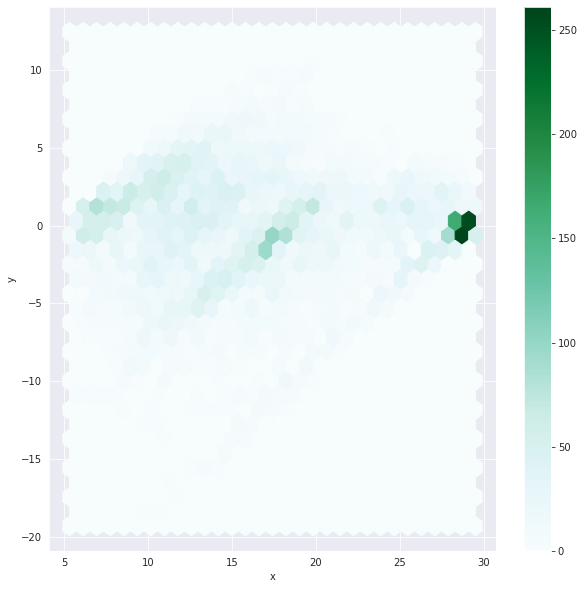

In [872]:
plotting_df = pd.DataFrame({'x': pred_int_rate,
                   'y': pred_int_rate - sub_grade_int_rate})
ax = plotting_df.plot.hexbin(x='x', y='y', gridsize=30, figsize = (10, 10),sharex=False)

In [873]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(sub_grade_int_rate, pred_int_rate))
print(mean_squared_error(sub_grade_int_rate, pred_int_rate, squared= False))


0.7486248628791244
3.6585956406027296


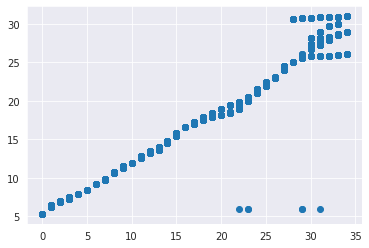

In [874]:
plt.scatter(nn_df_with_int_rate["sub_grade"], nn_df_with_int_rate["int_rate"])

### Fine-Tuning Using A Random Forest Regressor

In [875]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

random_forest_regressor = RandomForestRegressor(max_depth = 100, min_samples_leaf=10, min_samples_split=5,
                      n_estimators=100)
linear_regressor = LinearRegression()

In [876]:
all_data = np.hstack((normalizedX, pred_int_rate.reshape((pred_int_rate.shape[0], 1))))

In [877]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_data, nn_df_with_int_rate["sub_grade"], test_size = 0.2, random_state = 0)

In [878]:
random_forest_regressor.fit(X_train, y_train)
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [879]:
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [25, 50, 75, 100],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# # Create a based model
# random_forest_regressor = RandomForestRegressor()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = random_forest_regressor, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 4)

# grid_search.fit(X_train, y_train)
# grid_search.best_params_

In [880]:
best_rf = random_forest_regressor

In [881]:
final_results = pd.DataFrame({"Actual": y_test,"Multi-Linear":linear_regressor.predict(X_test),
                              "Random Forest": best_rf.predict(X_test),
                              })

In [882]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

rf_rms = mean_squared_error(final_results['Actual'], final_results['Random Forest'], squared=False)

rf_rms_train = mean_squared_error(y_train, best_rf.predict(X_train), squared= False)
rf_r2 = r2_score(final_results['Actual'], final_results['Random Forest'])
rf_r2_train = r2_score(y_train, best_rf.predict(X_train))

lin_rms = mean_squared_error(final_results['Actual'], final_results['Multi-Linear'], squared=False)
lin_rms_train = mean_squared_error(y_train, linear_regressor.predict(X_train),  squared= False)
lin_r2 = r2_score(final_results['Actual'], final_results['Multi-Linear'])
lin_r2_train = r2_score(y_train, linear_regressor.predict(X_train))


In [883]:
rf_rms_train

3.7633335324658765

### Verifying Predictions Sufficiently Model Sub-Grade Classes

In [886]:
nn_df_reset_ind = nn_df_with_int_rate.reset_index(drop= True)
pred_int_rate = best_rf.predict(all_data)

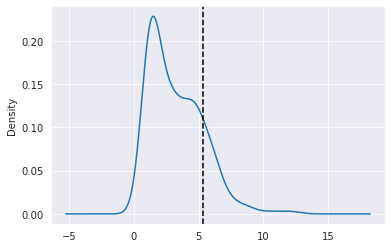

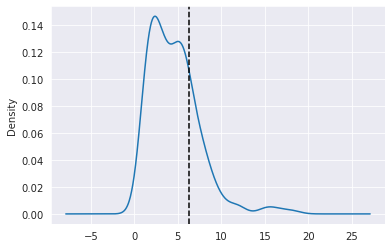

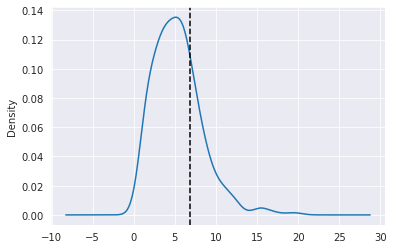

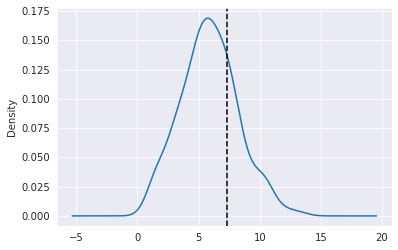

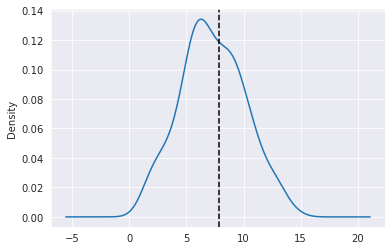

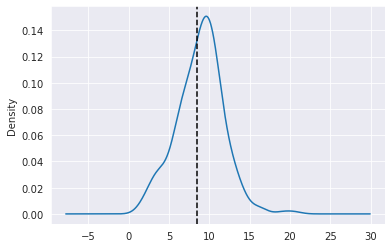

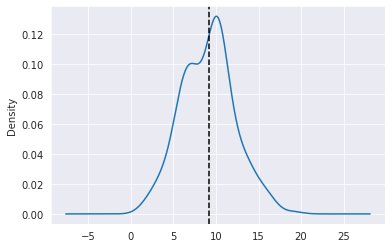

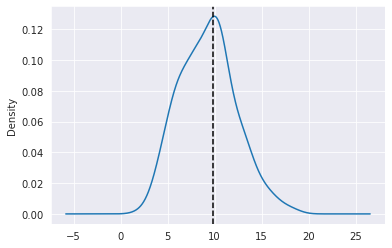

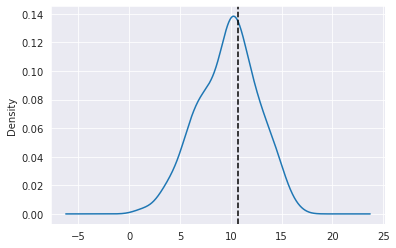

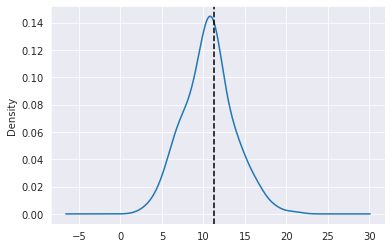

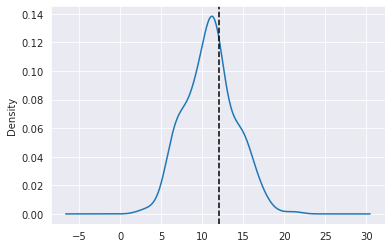

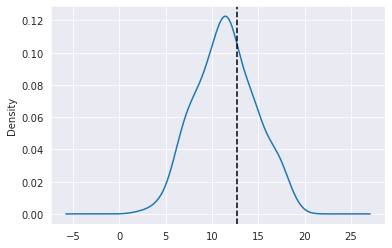

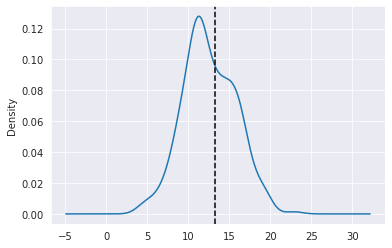

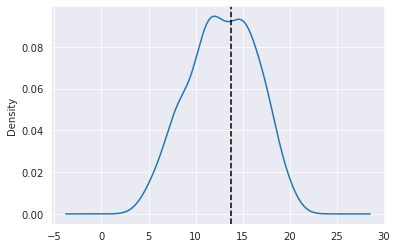

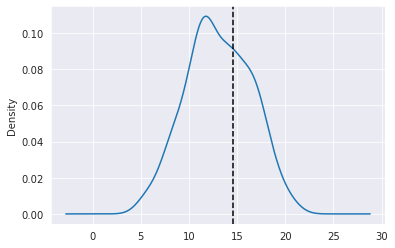

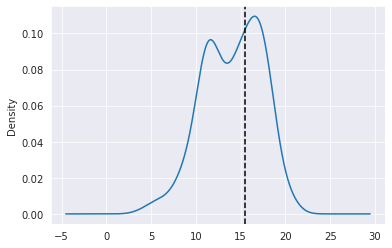

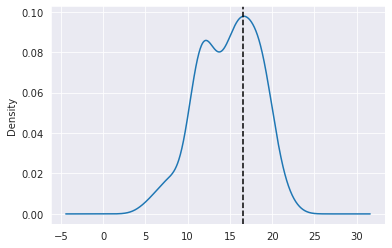

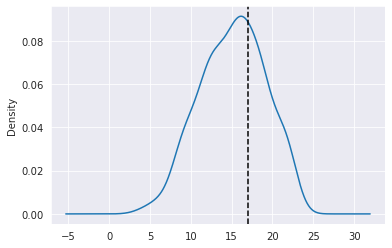

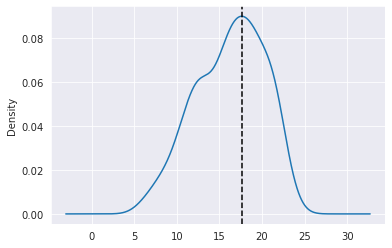

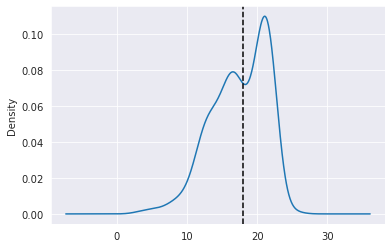

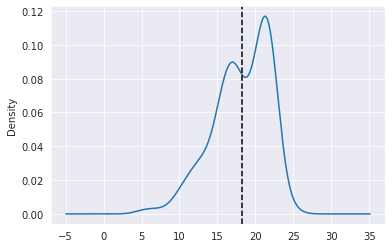

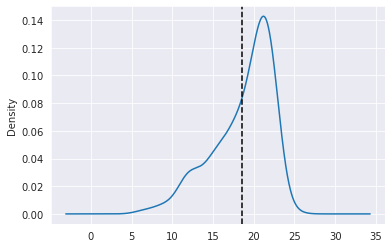

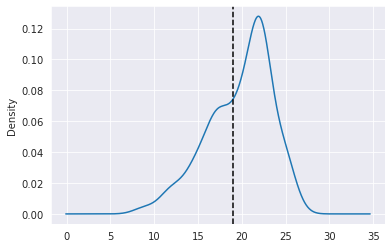

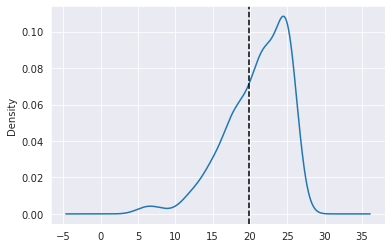

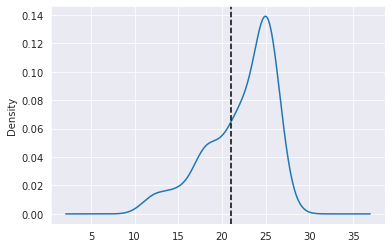

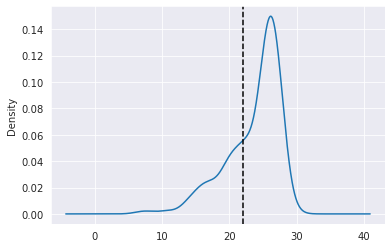

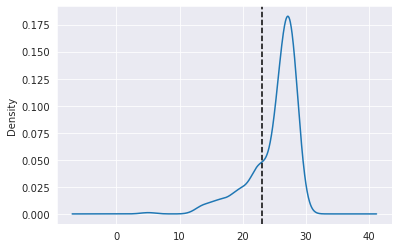

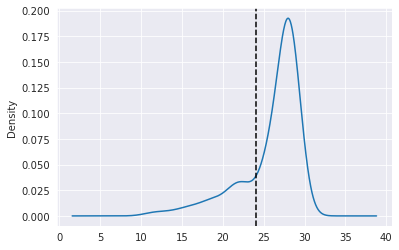

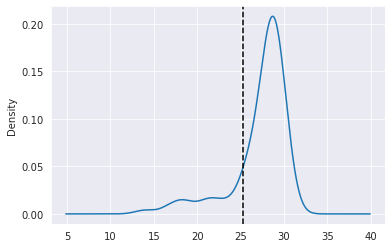

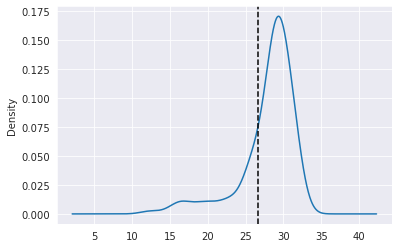

In [892]:
pred_int_rate = pd.Series(pred_int_rate)
for i in range(30):
    pred_int_rate[nn_df_reset_ind["sub_grade"] == i].plot(kind = "kde")
    # nn_df_reset_ind["int_rate"][nn_df_reset_ind["sub_grade"] == i].plot(kind = "kde")
    plt.axvline(x=sub_grade_to_int_rate[i], color='k', linestyle='--')
    plt.show()

<AxesSubplot:ylabel='Density'>

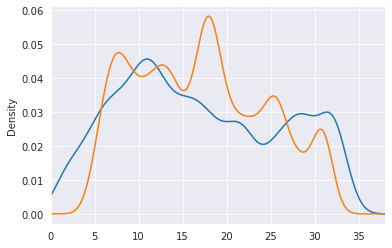

In [897]:
pred_int_rate.plot(kind = "kde")
nn_df_with_int_rate["int_rate"].plot(kind = "kde", xlim = [0, 38])